## US Oil and Gas Production

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [29]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(12)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870
5,2008-11-01,71662,9876,1422,1092,3311,5297,7126,681,1275,524,22218,5145,245,269,4078,326,3916,3978,882
6,2008-12-01,71840,9972,1517,988,3064,5672,7297,657,1259,569,22112,5318,248,242,3957,302,3802,3998,866
7,2009-01-01,72643,9533,1605,1009,3006,6351,7067,679,1273,783,22211,5322,254,241,3968,304,3829,4330,876
8,2009-02-01,74077,10007,1627,1018,3280,6635,7220,695,1289,832,22025,5433,251,243,4063,311,3925,4353,871
9,2009-03-01,72983,9594,1679,994,2901,6726,7135,712,1300,758,22007,5262,245,245,4018,305,3941,4298,864


In [7]:
gas_df.shape

(121, 20)

In [8]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [9]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    object
U.S.      int64
dtype: object

In [34]:
gas_df["Month"] = pd.to_datetime(gas_df["Month"])

In [35]:
gas_df.dtypes[0:2]

Month    datetime64[ns]
U.S.              int64
dtype: object

In [36]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

---

## Yearly Gas production

In [88]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year)
yearly_gas_df = yearly_gas_df.sum()
yearly_gas_df.index.rename("Year", inplace = True)
yearly_gas_df.head()


,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092


In [89]:
US_yearly_gas_df = yearly_gas_df.filter(items = ['Year', 'U.S.'])

<AxesSubplot:xlabel='Year', ylabel='Total US gas production per year'>

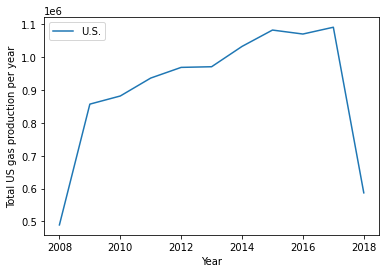

In [90]:
plot = US_yearly_gas_df.plot()
plot.set_ylabel('Total US gas production per year')
plot

Text(0, 0.5, 'Total US gas production per year')

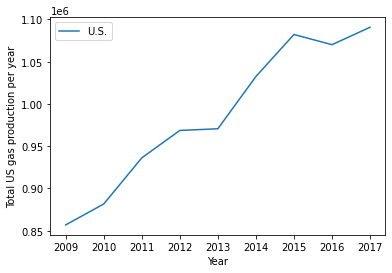

In [91]:
US_yearly_gas_df = US_yearly_gas_df[np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)]
filtered = US_yearly_gas_df.plot()
filtered.set_ylabel('Total US gas production per year')

### State production

Let's have a look at the yearly production of some specific states

In [92]:
full_yearly_gas_df = yearly_gas_df[np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)]
full_yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


In [93]:
full_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

In [98]:
states_yearly_gas_df = yearly_gas_df.filter(items = ['Alaska', 'Arkansas', 'Utah', 'Texas'])

In [99]:
states_yearly_gas_df

,Alaska,Arkansas,Utah,Texas
Year,,,,
2008,64732,9395,8726,151483
2009,108986,22353,14782,251694
2010,105219,30475,14361,249632
2011,104154,35384,15170,260747
2012,103856,37571,16079,266989
2013,105776,37466,15482,272844
2014,104298,36917,14946,284598
2015,104447,33221,13717,289330
2016,105900,26999,11958,266713


Text(0, 0.5, 'Gas production per year')

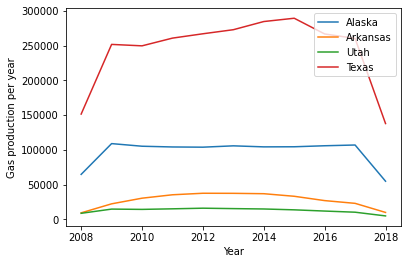

In [100]:
states = states_yearly_gas_df.plot()
states.set_ylabel('Gas production per year')

---

## Comparing with Crude Oil Production

In [225]:
file = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file, decimal=",")

In [226]:
oil_df["Month"] = pd.to_datetime(oil_df["Month"])

In [227]:
yearly_oil_df = oil_df.groupby(gas_df['Month'].dt.year)
yearly_oil_df = yearly_oil_df.sum()
yearly_oil_df.index.rename("Year", inplace = True)

In [228]:
yearly_gas_df = yearly_gas_df.filter(items = ['Year', 'U.S.'])
yearly_oil_df = yearly_oil_df.filter(items = ['Year', 'U.S. Crude Oil '])

In [229]:
yearly_oil_df = yearly_oil_df[np.logical_and(yearly_oil_df.index >= 2009, yearly_oil_df.index <= 2017)]
yearly_gas_df= yearly_gas_df[np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)]

In [240]:
yearly_gas_df = yearly_gas_df.rename(columns={"U.S.": "Gas"})
yearly_oil_df = yearly_oil_df.rename(columns={"U.S. Crude Oil ": "Crude Oil"})

In [239]:
yearly_gasyearly_merged_df

,Gas
Year,
2009,856876
2010,881622
2011,936163
2012,968632
2013,970617
2014,1032439
2015,1082158
2016,1070085
2017,1090730


In [243]:
yearly_merged = pd.concat((yearly_gas_df, yearly_oil_df), axis = 1)

In [244]:
yearly_merged

,Gas,Crude Oil
Year,,
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585
2014,1032439,105064
2015,1082158,113179
2016,1070085,105970
2017,1090730,112205


gas : Millions of cubic feet per day
Oil Units: Thousands of barrels per day

In [264]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

Text(0, 0.5, 'Production per year')

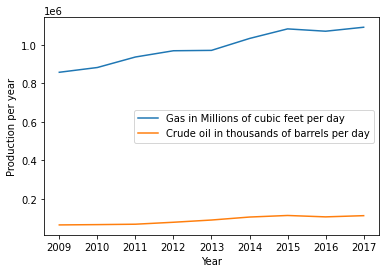

In [273]:
fig, ax = plt.subplots()
yearly_merged.plot(kind='line', ax=ax)
ax.legend(["Gas in Millions of cubic feet per day", "Crude oil in thousands of barrels per day"])
ax.set_ylabel('Production per year')